In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()

In [ ]:
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
data['target'] = data['target'].astype(int)

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
class_0_1_data = data[data['target'].isin([0, 1])]

In [ ]:
class_0_1_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
X = class_0_1_data.drop('target', axis=1)
y = class_0_1_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
76,6.8,2.8,4.8,1.4
77,6.7,3.0,5.0,1.7
12,4.8,3.0,1.4,0.1
31,5.4,3.4,1.5,0.4
...,...,...,...,...
60,5.0,2.0,3.5,1.0
71,6.1,2.8,4.0,1.3
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
y_train

4     0
76    1
77    1
12    0
31    0
     ..
60    1
71    1
14    0
92    1
51    1
Name: target, Length: 85, dtype: int64

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


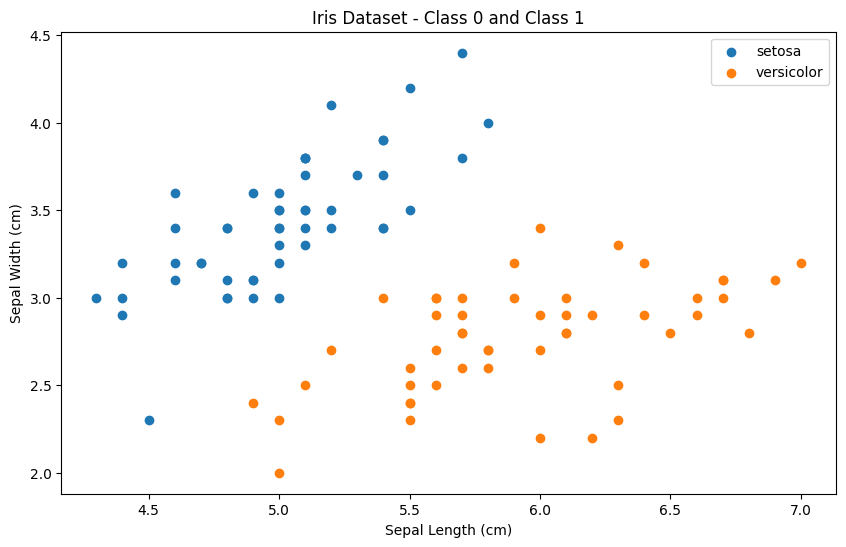

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.scatter(X[y == i].iloc[:, 0], X[y == i].iloc[:, 1], label=iris.target_names[i])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Class 0 and Class 1')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
data['target'] = data['target'].astype(int)

In [ ]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
k = 5

In [ ]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
k_values = []
accuracies = []

In [ ]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracies.append(accuracy)

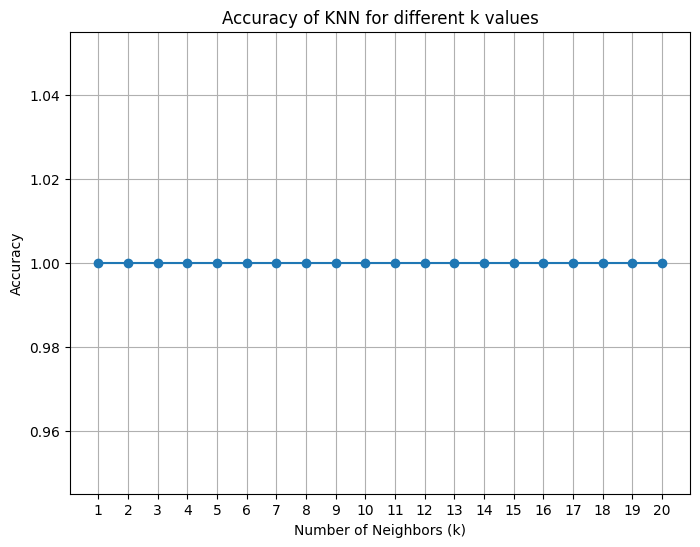

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN for different k values')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()